In [ ]:
import os
import sys
import shutil
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from collections import defaultdict
import yaml
from pathlib import Path
import torch
import torch.nn as nn
from IPython.display import display, clear_output
from google.colab import drive

In [ ]:
print("Mounting Google Drive...")
drive.mount('/content/drive')

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Installing required packages...")
!pip install ultralytics roboflow supervision
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Installing required packages...
Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
import ultralytics
from ultralytics import YOLO
import supervision as sv

⚠️  Before running, please update the DATASET_ZIP_PATH variable above!
Current path: /content/drive/MyDrive/yolov11dataset.zip
🚀 Starting YOLOv3 Animal Detection Training Pipeline
Extracting dataset from /content/drive/MyDrive/yolov11dataset.zip...
Dataset extracted to /content/animal_detection
Dataset root: /content/animal_detection
Creating YOLO directory structure...
Classes: ['Domestic Animal', 'No Animal', 'wild Animal']
Dataset split - Train: 1411, Val: 403, Test: 202
YOLO dataset created at: /content/animal_detection_yolo
Dataset YAML saved at: /content/animal_detection_yolo/dataset.yaml
✅ Dataset setup completed!
Starting YOLO training...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/cont

train: Scanning /content/animal_detection_yolo/train/labels... 1842 images, 6 backgrounds, 4 corrupt: 100%|██████████| 1842/1842 [00:01<00:00, 1266.65it/s]

train: /content/animal_detection_yolo/train/images/6deaefc1-800px-Fourhornedantelope.JPG.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2001]
train: /content/animal_detection_yolo/train/images/70d3098d-01345311.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.009]
train: /content/animal_detection_yolo/train/images/7ab0c269-ghnewsok-OK-3391446-16d29d07.jpeg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0078]
train: /content/animal_detection_yolo/train/images/cae75177-Four_horned_antelope.jpg: corrupt JPEG restored and saved
train: /content/animal_detection_yolo/train/images/fd43b321-30d3c289d7.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2023]


train: New cache created: /content/animal_detection_yolo/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.4GB RAM): 100%|██████████| 1838/1838 [00:22<00:00, 83.08it/s] 


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 904.2±1233.0 MB/s, size: 530.7 KB)


val: Scanning /content/animal_detection_yolo/val/labels... 732 images, 1 backgrounds, 2 corrupt: 100%|██████████| 732/732 [00:01<00:00, 599.72it/s]

val: /content/animal_detection_yolo/val/images/29866319-A-and-B-Minor-injuries-sustained-by-Mugger-Crocodiles-Crocodylus-palus_s7XVAgH.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.898]
val: /content/animal_detection_yolo/val/images/70d3098d-01345311.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.009]
val: /content/animal_detection_yolo/val/images/cae75177-Four_horned_antelope.jpg: corrupt JPEG restored and saved
val: New cache created: /content/animal_detection_yolo/val/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.6GB RAM): 100%|██████████| 730/730 [00:09<00:00, 78.94it/s] 


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.08G      1.527      2.197      1.786         43        640: 100%|██████████| 115/115 [00:34<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.33it/s]

                   all        730       1053     0.0293      0.233     0.0224    0.00708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.95G      1.668      2.108      1.901         39        640: 100%|██████████| 115/115 [00:31<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.38it/s]


                   all        730       1053    0.00449     0.0385    0.00396    0.00146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.97G      1.632      2.027      1.861         49        640: 100%|██████████| 115/115 [00:29<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.15it/s]


                   all        730       1053     0.0891      0.182     0.0637     0.0214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.98G      1.549      1.935      1.805         58        640: 100%|██████████| 115/115 [00:30<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.92it/s]


                   all        730       1053      0.191      0.261      0.153     0.0658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         3G      1.475      1.855      1.737         51        640: 100%|██████████| 115/115 [00:29<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.88it/s]


                   all        730       1053      0.267      0.306      0.232      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.02G      1.452      1.775      1.708         50        640: 100%|██████████| 115/115 [00:29<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.91it/s]


                   all        730       1053      0.263      0.292      0.245       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.04G      1.423      1.724      1.685         48        640: 100%|██████████| 115/115 [00:30<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.92it/s]


                   all        730       1053      0.329      0.341      0.297      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.05G      1.368      1.656      1.642         43        640: 100%|██████████| 115/115 [00:30<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.86it/s]


                   all        730       1053      0.303       0.29      0.247      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.07G      1.332      1.585      1.615         58        640: 100%|██████████| 115/115 [00:30<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.14it/s]

                   all        730       1053      0.338      0.299      0.261      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.09G        1.3      1.547      1.601         44        640: 100%|██████████| 115/115 [00:30<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.09it/s]


                   all        730       1053      0.243      0.327      0.261      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       3.1G      1.271      1.503      1.562         58        640: 100%|██████████| 115/115 [00:30<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.99it/s]


                   all        730       1053      0.376      0.352      0.334      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.12G      1.251      1.445      1.548         70        640: 100%|██████████| 115/115 [00:30<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.84it/s]


                   all        730       1053      0.413      0.388        0.4      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.14G      1.241      1.447      1.538         50        640: 100%|██████████| 115/115 [00:30<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.97it/s]

                   all        730       1053      0.419      0.383      0.397      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.15G      1.232      1.431      1.539         47        640: 100%|██████████| 115/115 [00:30<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.60it/s]

                   all        730       1053      0.413      0.397      0.395      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.17G      1.219      1.381      1.528         51        640: 100%|██████████| 115/115 [00:30<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.71it/s]

                   all        730       1053      0.446      0.421       0.44       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.19G      1.215      1.369      1.521         47        640: 100%|██████████| 115/115 [00:31<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.86it/s]

                   all        730       1053      0.414      0.403      0.417      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.21G      1.181      1.361      1.493         45        640: 100%|██████████| 115/115 [00:30<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.06it/s]

                   all        730       1053      0.376      0.404      0.412      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.22G      1.205      1.374      1.506         45        640: 100%|██████████| 115/115 [00:30<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.03it/s]

                   all        730       1053       0.46      0.392      0.435      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.24G      1.183      1.327      1.494         46        640: 100%|██████████| 115/115 [00:29<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.14it/s]

                   all        730       1053      0.448      0.443      0.452      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.26G      1.169       1.31       1.48         44        640: 100%|██████████| 115/115 [00:29<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.93it/s]


                   all        730       1053      0.375      0.381      0.406      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.27G      1.151      1.283       1.47         56        640: 100%|██████████| 115/115 [00:30<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.01it/s]

                   all        730       1053       0.49      0.402      0.462      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.29G      1.154      1.286       1.48         54        640: 100%|██████████| 115/115 [00:31<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.95it/s]

                   all        730       1053      0.442      0.405      0.426      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.31G      1.125      1.222      1.444         60        640: 100%|██████████| 115/115 [00:30<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.02it/s]

                   all        730       1053      0.442      0.436      0.457      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.32G       1.13      1.232      1.463         44        640: 100%|██████████| 115/115 [00:30<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.66it/s]

                   all        730       1053      0.489      0.437      0.472      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.34G      1.121      1.229      1.447         44        640: 100%|██████████| 115/115 [00:30<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.60it/s]

                   all        730       1053      0.434      0.428      0.464      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.36G      1.101      1.173      1.429         50        640: 100%|██████████| 115/115 [00:31<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.38it/s]

                   all        730       1053      0.471      0.463      0.506       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.38G      1.091      1.208      1.421         48        640: 100%|██████████| 115/115 [00:30<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.00it/s]

                   all        730       1053      0.509      0.453      0.506      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.39G      1.092      1.168      1.424         50        640: 100%|██████████| 115/115 [00:32<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.73it/s]

                   all        730       1053      0.492      0.464      0.501      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.41G      1.085      1.167      1.417         50        640: 100%|██████████| 115/115 [00:30<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.70it/s]

                   all        730       1053      0.535      0.435      0.511      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.43G       1.07      1.167      1.419         44        640: 100%|██████████| 115/115 [00:31<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.88it/s]

                   all        730       1053      0.488      0.447      0.493      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.45G      1.081      1.155      1.417         71        640: 100%|██████████| 115/115 [00:30<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.68it/s]

                   all        730       1053      0.526       0.47      0.516      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.46G      1.075      1.129      1.406         43        640: 100%|██████████| 115/115 [00:31<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.96it/s]

                   all        730       1053      0.517      0.449      0.508      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.48G      1.068      1.112      1.405         43        640: 100%|██████████| 115/115 [00:30<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.00it/s]

                   all        730       1053      0.495      0.485      0.518      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       3.5G      1.056      1.129      1.401         56        640: 100%|██████████| 115/115 [00:31<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.88it/s]

                   all        730       1053      0.527      0.483      0.534      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.51G      1.042      1.097      1.391         43        640: 100%|██████████| 115/115 [00:30<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.66it/s]

                   all        730       1053      0.541      0.471      0.526       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.53G      1.058      1.082      1.399         59        640: 100%|██████████| 115/115 [00:30<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.64it/s]

                   all        730       1053      0.538      0.509      0.548      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.55G      1.014      1.049      1.368         59        640: 100%|██████████| 115/115 [00:30<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.71it/s]

                   all        730       1053      0.513      0.484      0.536      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.56G      1.039       1.06      1.379         50        640: 100%|██████████| 115/115 [00:31<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.75it/s]

                   all        730       1053      0.432      0.431      0.462      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.58G      1.003      1.027      1.362         55        640: 100%|██████████| 115/115 [00:31<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.40it/s]

                   all        730       1053      0.502      0.482      0.528      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       3.6G       1.04      1.045      1.383         43        640: 100%|██████████| 115/115 [00:31<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.84it/s]

                   all        730       1053      0.524      0.481      0.528       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.62G      1.007      1.026      1.361         45        640: 100%|██████████| 115/115 [00:31<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.17it/s]

                   all        730       1053      0.581      0.493       0.56      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.63G      1.008      1.021       1.36         53        640: 100%|██████████| 115/115 [00:31<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.62it/s]

                   all        730       1053      0.531      0.517      0.557      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.65G      1.002      1.005      1.364         53        640: 100%|██████████| 115/115 [00:30<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.72it/s]

                   all        730       1053      0.512      0.497      0.546      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.67G      1.004      0.999      1.357         45        640: 100%|██████████| 115/115 [00:30<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.08it/s]

                   all        730       1053      0.561      0.521      0.581      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.68G     0.9945     0.9886      1.359         59        640: 100%|██████████| 115/115 [00:31<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.87it/s]

                   all        730       1053      0.557      0.512      0.568       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       3.7G     0.9995      1.008      1.346         42        640: 100%|██████████| 115/115 [00:30<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.09it/s]

                   all        730       1053      0.561      0.515      0.573      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.72G     0.9685     0.9518      1.333         49        640: 100%|██████████| 115/115 [00:30<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.95it/s]

                   all        730       1053      0.565      0.508       0.57      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.73G     0.9785     0.9599       1.34         43        640: 100%|██████████| 115/115 [00:30<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.04it/s]

                   all        730       1053      0.548      0.516      0.571      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.75G     0.9797     0.9686      1.334         65        640: 100%|██████████| 115/115 [00:30<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.94it/s]

                   all        730       1053      0.514      0.519      0.562      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.77G     0.9554     0.9372      1.327         52        640: 100%|██████████| 115/115 [00:29<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.40it/s]

                   all        730       1053      0.571      0.496      0.568      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.79G     0.9717      0.965      1.335         30        640: 100%|██████████| 115/115 [00:29<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.01it/s]

                   all        730       1053      0.571      0.506      0.572      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.8G     0.9353     0.9253      1.318         49        640: 100%|██████████| 115/115 [00:30<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.51it/s]

                   all        730       1053      0.556      0.493      0.552      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.82G     0.9405      0.901      1.305         47        640: 100%|██████████| 115/115 [00:29<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.85it/s]

                   all        730       1053      0.564      0.521      0.573      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.84G     0.9369     0.8995      1.294         48        640: 100%|██████████| 115/115 [00:29<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.21it/s]

                   all        730       1053      0.583      0.513      0.574      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.85G      0.945     0.8891      1.304         63        640: 100%|██████████| 115/115 [00:29<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.64it/s]

                   all        730       1053      0.579      0.546      0.594      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.87G     0.9302      0.895      1.301         67        640: 100%|██████████| 115/115 [00:29<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.50it/s]

                   all        730       1053      0.586      0.525      0.587      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.89G     0.9163     0.8942      1.298         50        640: 100%|██████████| 115/115 [00:30<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.19it/s]

                   all        730       1053      0.573       0.53      0.591      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.91G     0.9298     0.8746      1.295         50        640: 100%|██████████| 115/115 [00:30<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.22it/s]

                   all        730       1053      0.582       0.53      0.592      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.92G     0.9297     0.8696      1.299         49        640: 100%|██████████| 115/115 [00:29<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.19it/s]

                   all        730       1053      0.585      0.552      0.605      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.94G     0.9272     0.8708      1.297         46        640: 100%|██████████| 115/115 [00:29<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.04it/s]

                   all        730       1053      0.584      0.561      0.599      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.96G     0.9168     0.8587      1.282         53        640: 100%|██████████| 115/115 [00:30<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.19it/s]

                   all        730       1053      0.611       0.55      0.608      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.97G     0.9082     0.8457      1.278         49        640: 100%|██████████| 115/115 [00:29<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.07it/s]

                   all        730       1053      0.601      0.536      0.602      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.99G     0.9164     0.8726      1.295         46        640: 100%|██████████| 115/115 [00:30<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.22it/s]

                   all        730       1053      0.581       0.56      0.601      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.01G     0.8941     0.8539      1.277         33        640: 100%|██████████| 115/115 [00:29<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.08it/s]

                   all        730       1053      0.615      0.546      0.609      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.02G     0.8972     0.8388      1.267         51        640: 100%|██████████| 115/115 [00:29<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.64it/s]

                   all        730       1053       0.58       0.56      0.602      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.04G     0.8866     0.8367      1.272         40        640: 100%|██████████| 115/115 [00:30<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.77it/s]

                   all        730       1053      0.601       0.54      0.605       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.06G     0.8784     0.8113      1.262         52        640: 100%|██████████| 115/115 [00:30<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.14it/s]

                   all        730       1053      0.592      0.555      0.608      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.08G     0.8814     0.8078      1.264         53        640: 100%|██████████| 115/115 [00:30<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.19it/s]

                   all        730       1053      0.596      0.559      0.609      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.09G     0.8699     0.7839      1.253         42        640: 100%|██████████| 115/115 [00:29<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.10it/s]

                   all        730       1053      0.604      0.566      0.616      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.11G     0.8772     0.8028      1.261         42        640: 100%|██████████| 115/115 [00:29<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]

                   all        730       1053      0.593      0.564       0.61      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.13G     0.8645     0.7932      1.257         45        640: 100%|██████████| 115/115 [00:30<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.64it/s]

                   all        730       1053      0.597      0.567      0.615      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.14G     0.8593     0.7875       1.25         62        640: 100%|██████████| 115/115 [00:30<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]

                   all        730       1053      0.623      0.557       0.62      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.16G     0.8698     0.7765      1.249         38        640: 100%|██████████| 115/115 [00:30<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.57it/s]

                   all        730       1053      0.599       0.57      0.619      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.18G     0.8479     0.7609      1.239         55        640: 100%|██████████| 115/115 [00:30<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.33it/s]

                   all        730       1053      0.617      0.555      0.618      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       4.2G     0.8563     0.7775       1.24         45        640: 100%|██████████| 115/115 [00:30<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.14it/s]

                   all        730       1053      0.608      0.584      0.621       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.21G     0.8423     0.7704      1.239         63        640: 100%|██████████| 115/115 [00:30<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.06it/s]

                   all        730       1053      0.601      0.575      0.622      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.23G     0.8371     0.7503      1.236         36        640: 100%|██████████| 115/115 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.87it/s]

                   all        730       1053      0.614      0.572      0.621      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.25G     0.8472     0.7676       1.24         41        640: 100%|██████████| 115/115 [00:30<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.98it/s]

                   all        730       1053      0.615      0.573      0.624       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.26G     0.8388     0.7501      1.235         44        640: 100%|██████████| 115/115 [00:31<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.36it/s]

                   all        730       1053      0.624      0.575      0.627      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.28G      0.821     0.7441      1.228         44        640: 100%|██████████| 115/115 [00:30<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.78it/s]

                   all        730       1053      0.615      0.579      0.624      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       4.3G     0.8535     0.7679      1.246         46        640: 100%|██████████| 115/115 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.87it/s]

                   all        730       1053      0.609      0.574      0.619      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.31G     0.8183     0.7203      1.221         48        640: 100%|██████████| 115/115 [00:31<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.32it/s]

                   all        730       1053      0.619      0.579      0.625      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.33G     0.8193     0.7245      1.216         56        640: 100%|██████████| 115/115 [00:30<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.20it/s]

                   all        730       1053      0.608      0.584      0.628      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.35G     0.8187      0.722      1.226         62        640: 100%|██████████| 115/115 [00:30<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.58it/s]

                   all        730       1053      0.625      0.583      0.628      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.37G     0.8027     0.7177       1.21         52        640: 100%|██████████| 115/115 [00:30<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.60it/s]

                   all        730       1053      0.605        0.6       0.63      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.38G      0.812     0.7022      1.218         61        640: 100%|██████████| 115/115 [00:30<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.45it/s]

                   all        730       1053      0.603      0.602      0.629      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       4.4G     0.8108     0.7003      1.215         50        640: 100%|██████████| 115/115 [00:31<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.78it/s]

                   all        730       1053      0.617      0.587       0.63      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.42G      0.788     0.6904      1.203         53        640: 100%|██████████| 115/115 [00:30<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.97it/s]

                   all        730       1053      0.608      0.594      0.628      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.43G      0.801     0.6952      1.217         46        640: 100%|██████████| 115/115 [00:32<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.05it/s]

                   all        730       1053      0.624      0.592      0.631      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.45G      0.793     0.6911      1.211         52        640: 100%|██████████| 115/115 [00:30<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.77it/s]

                   all        730       1053      0.622      0.593      0.632      0.514


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.47G     0.7245     0.5929      1.201         20        640: 100%|██████████| 115/115 [00:32<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.16it/s]

                   all        730       1053      0.619      0.585      0.626      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.48G     0.7053     0.5367      1.185         23        640: 100%|██████████| 115/115 [00:29<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.62it/s]

                   all        730       1053      0.606      0.595      0.628      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       4.5G      0.681     0.5252      1.161         21        640: 100%|██████████| 115/115 [00:29<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.69it/s]

                   all        730       1053      0.613      0.598      0.632      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.52G       0.67     0.4877      1.151         25        640: 100%|██████████| 115/115 [00:29<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.19it/s]


                   all        730       1053      0.618      0.597      0.633      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.54G     0.6608     0.4851      1.135         19        640: 100%|██████████| 115/115 [00:29<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  3.93it/s]

                   all        730       1053      0.615      0.608      0.633      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.55G     0.6563     0.4857      1.141         20        640: 100%|██████████| 115/115 [00:30<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.22it/s]

                   all        730       1053      0.621      0.591      0.635      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.57G     0.6605      0.478      1.138         18        640: 100%|██████████| 115/115 [00:29<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.04it/s]

                   all        730       1053      0.624      0.596      0.636      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.59G     0.6543     0.4707      1.137         18        640: 100%|██████████| 115/115 [00:29<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.73it/s]

                   all        730       1053      0.617      0.602      0.635      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.61G     0.6219     0.4607      1.117         17        640: 100%|██████████| 115/115 [00:29<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.88it/s]

                   all        730       1053      0.632      0.595      0.636      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.62G      0.636     0.4476       1.12         19        640: 100%|██████████| 115/115 [00:29<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.29it/s]

                   all        730       1053      0.633      0.598      0.636      0.527



100 epochs completed in 1.000 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.31it/s]


                   all        730       1053      0.632      0.598      0.636      0.528
       Domestic Animal        197        339       0.92      0.888      0.944      0.771
             No Animal          1          1          0          0          0          0
           wild Animal        532        713      0.977      0.905      0.965      0.811
Speed: 0.4ms preprocess, 2.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train2
Training completed!
✅ Training completed!
Best model saved at: runs/detect/train2/weights/best.pt
Calculating metrics on test data...
Evaluating on 383 test images...
Processing image 1/383
Processing image 51/383
Processing image 101/383
Processing image 151/383
Processing image 201/383
Processing image 251/383
Processing image 301/383
Processing image 351/383
✅ Evaluation completed!

MODEL EVALUATION RESULTS

Overall Performance:
  Accuracy:  0.8578
  Precision: 0.9152
  Recall:    0.9319
  F1-Score:  0.9235

Detection

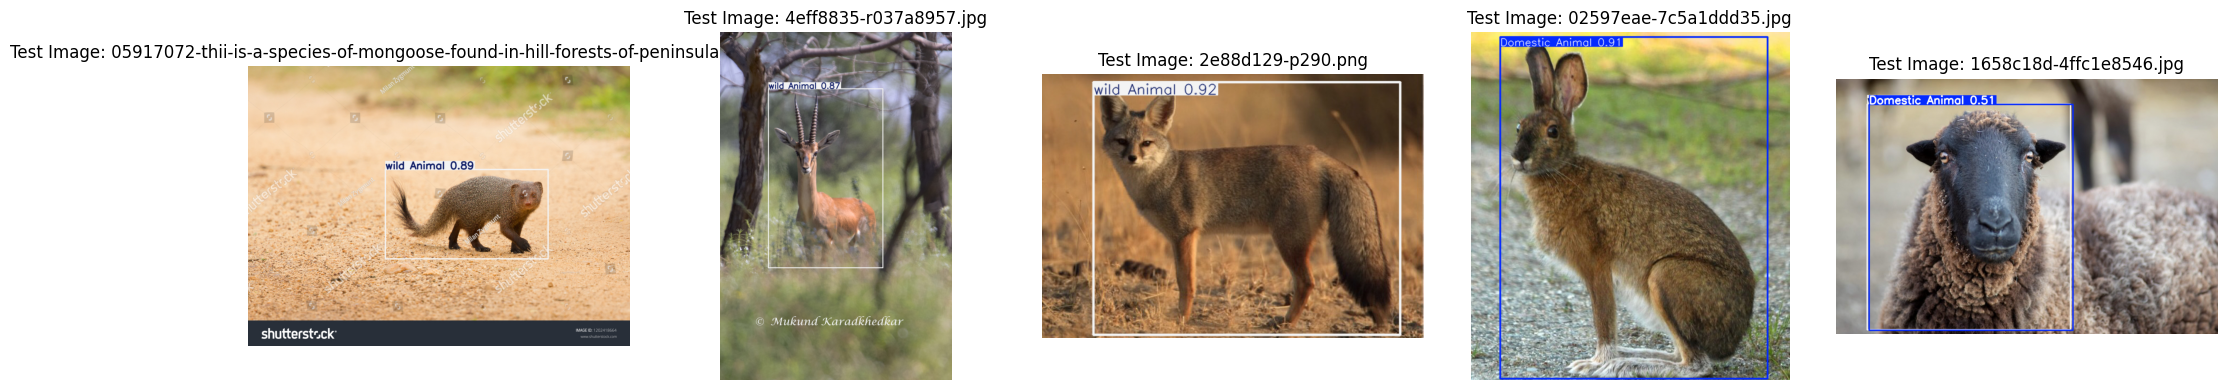


🎉 Pipeline completed successfully!
📁 Best model saved at: runs/detect/train2/weights/best.pt
📈 Metrics saved to: /content/evaluation_metrics.json


In [ ]:
DATASET_ZIP_PATH = "/content/drive/MyDrive/yolov11dataset.zip"  # Update this path
DATASET_NAME = "animal_detection"
EPOCHS = 100
IMG_SIZE = 640
BATCH_SIZE = 16
CONFIDENCE_THRESHOLD = 0.25
IOU_THRESHOLD = 0.45

class DatasetSetup:
    """Handle dataset extraction and YOLO format conversion"""

    def __init__(self, zip_path, dataset_name):
        self.zip_path = zip_path
        self.dataset_name = dataset_name
        self.base_path = f"/content/{dataset_name}"

    def extract_dataset(self):
        """Extract dataset from zip file"""
        print(f"Extracting dataset from {self.zip_path}...")

        # Create base directory
        os.makedirs(self.base_path, exist_ok=True)

        # Extract zip file
        with zipfile.ZipFile(self.zip_path, 'r') as zip_ref:
            zip_ref.extractall(self.base_path)

        print(f"Dataset extracted to {self.base_path}")

        # Find the actual dataset folder (in case it's nested)
        for root, dirs, files in os.walk(self.base_path):
            if 'images' in dirs and 'labels' in dirs:
                self.dataset_root = root
                break
        else:
            # If images and labels are directly in base_path
            self.dataset_root = self.base_path

        print(f"Dataset root: {self.dataset_root}")
        return self.dataset_root

    def create_yolo_structure(self):
        """Create YOLO-compatible directory structure"""
        print("Creating YOLO directory structure...")

        # Create YOLO structure
        yolo_path = f"/content/{self.dataset_name}_yolo"
        os.makedirs(yolo_path, exist_ok=True)

        # Create train/val/test directories
        for split in ['train', 'val', 'test']:
            os.makedirs(f"{yolo_path}/{split}/images", exist_ok=True)
            os.makedirs(f"{yolo_path}/{split}/labels", exist_ok=True)

        # Read classes
        classes_file = os.path.join(self.dataset_root, 'classes.txt')
        if os.path.exists(classes_file):
            with open(classes_file, 'r') as f:
                classes = [line.strip() for line in f.readlines()]
        else:
            classes = ['Domestic Animal', 'No Animal', 'Wild Animal']

        print(f"Classes: {classes}")

        # Get all images and labels
        images_path = os.path.join(self.dataset_root, 'images')
        labels_path = os.path.join(self.dataset_root, 'labels')

        image_files = [f for f in os.listdir(images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Split dataset (70% train, 20% val, 10% test)
        np.random.shuffle(image_files)
        n_total = len(image_files)
        n_train = int(0.7 * n_total)
        n_val = int(0.2 * n_total)

        train_files = image_files[:n_train]
        val_files = image_files[n_train:n_train + n_val]
        test_files = image_files[n_train + n_val:]

        print(f"Dataset split - Train: {len(train_files)}, Val: {len(val_files)}, Test: {len(test_files)}")

        # Copy files to respective directories
        for split, files in [('train', train_files), ('val', val_files), ('test', test_files)]:
            for img_file in files:
                # Copy image
                src_img = os.path.join(images_path, img_file)
                dst_img = os.path.join(yolo_path, split, 'images', img_file)
                shutil.copy2(src_img, dst_img)

                # Copy corresponding label file
                label_file = os.path.splitext(img_file)[0] + '.txt'
                src_label = os.path.join(labels_path, label_file)
                dst_label = os.path.join(yolo_path, split, 'labels', label_file)

                if os.path.exists(src_label):
                    shutil.copy2(src_label, dst_label)
                else:
                    # Create empty label file if not exists
                    with open(dst_label, 'w') as f:
                        pass

        # Create dataset.yaml file
        dataset_yaml = {
            'path': yolo_path,
            'train': 'train/images',
            'val': 'val/images',
            'test': 'test/images',
            'nc': len(classes),
            'names': classes
        }

        yaml_path = os.path.join(yolo_path, 'dataset.yaml')
        with open(yaml_path, 'w') as f:
            yaml.dump(dataset_yaml, f)

        print(f"YOLO dataset created at: {yolo_path}")
        print(f"Dataset YAML saved at: {yaml_path}")

        return yolo_path, yaml_path

class YOLOTrainer:
    """Handle YOLO model training"""

    def __init__(self, yaml_path):
        self.yaml_path = yaml_path
        self.model = None

    def train_model(self, epochs=100, img_size=640, batch_size=16):
        """Train YOLO model"""
        print("Starting YOLO training...")

        # Initialize model
        self.model = YOLO('yolov8n.pt')  # Using YOLOv8 (more stable than v3)

        # Train model
        results = self.model.train(
            data=self.yaml_path,
            epochs=epochs,
            imgsz=img_size,
            batch=batch_size,
            save=True,
            cache=True,
            device=0 if torch.cuda.is_available() else 'cpu',
            verbose=True,
            patience=20,
            optimizer='AdamW',
            lr0=0.01,
            weight_decay=0.0005
        )

        print("Training completed!")
        return results

class ModelEvaluator:
    """Evaluate trained model and calculate metrics"""

    def __init__(self, model_path, test_data_path, class_names):
        self.model = YOLO(model_path)
        self.test_data_path = test_data_path
        self.class_names = class_names

    def calculate_metrics(self, conf_threshold=0.25, iou_threshold=0.45):
        """Calculate comprehensive metrics"""
        print("Calculating metrics on test data...")

        # Get test images
        images_path = os.path.join(self.test_data_path, 'images')
        labels_path = os.path.join(self.test_data_path, 'labels')

        image_files = [f for f in os.listdir(images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Metrics storage
        all_predictions = []
        all_ground_truths = []
        inference_times = []
        ious = []

        print(f"Evaluating on {len(image_files)} test images...")

        for i, img_file in enumerate(image_files):
            if i % 50 == 0:
                print(f"Processing image {i+1}/{len(image_files)}")

            img_path = os.path.join(images_path, img_file)
            label_path = os.path.join(labels_path, os.path.splitext(img_file)[0] + '.txt')

            # Load image
            img = cv2.imread(img_path)
            if img is None:
                continue

            h, w = img.shape[:2]

            # Inference with timing
            start_time = time.time()
            results = self.model(img_path, conf=conf_threshold, iou=iou_threshold, verbose=False)
            inference_time = time.time() - start_time
            inference_times.append(inference_time)

            # Parse predictions
            predictions = []
            if len(results) > 0 and results[0].boxes is not None:
                boxes = results[0].boxes
                for box in boxes:
                    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                    conf = box.conf[0].cpu().numpy()
                    cls = int(box.cls[0].cpu().numpy())

                    # Convert to center format for IoU calculation
                    cx = (x1 + x2) / (2 * w)
                    cy = (y1 + y2) / (2 * h)
                    width = (x2 - x1) / w
                    height = (y2 - y1) / h

                    predictions.append([cls, cx, cy, width, height, conf])

            # Parse ground truth
            ground_truths = []
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    for line in f:
                        if line.strip():
                            parts = line.strip().split()
                            if len(parts) >= 5:
                                cls = int(parts[0])
                                cx, cy, w_norm, h_norm = map(float, parts[1:5])
                                ground_truths.append([cls, cx, cy, w_norm, h_norm])

            all_predictions.append(predictions)
            all_ground_truths.append(ground_truths)

            # Calculate IoU for this image
            img_ious = self.calculate_image_iou(predictions, ground_truths)
            ious.extend(img_ious)

        # Calculate final metrics
        metrics = self.compute_final_metrics(all_predictions, all_ground_truths, ious, inference_times)
        return metrics

    def calculate_image_iou(self, predictions, ground_truths):
        """Calculate IoU for predictions vs ground truths in one image"""
        ious = []

        for pred in predictions:
            pred_cls, pred_cx, pred_cy, pred_w, pred_h = pred[:5]

            max_iou = 0
            for gt in ground_truths:
                gt_cls, gt_cx, gt_cy, gt_w, gt_h = gt

                if pred_cls == gt_cls:  # Same class
                    # Convert to corner format
                    pred_x1 = pred_cx - pred_w/2
                    pred_y1 = pred_cy - pred_h/2
                    pred_x2 = pred_cx + pred_w/2
                    pred_y2 = pred_cy + pred_h/2

                    gt_x1 = gt_cx - gt_w/2
                    gt_y1 = gt_cy - gt_h/2
                    gt_x2 = gt_cx + gt_w/2
                    gt_y2 = gt_cy + gt_h/2

                    # Calculate IoU
                    inter_x1 = max(pred_x1, gt_x1)
                    inter_y1 = max(pred_y1, gt_y1)
                    inter_x2 = min(pred_x2, gt_x2)
                    inter_y2 = min(pred_y2, gt_y2)

                    if inter_x2 > inter_x1 and inter_y2 > inter_y1:
                        inter_area = (inter_x2 - inter_x1) * (inter_y2 - inter_y1)
                        pred_area = pred_w * pred_h
                        gt_area = gt_w * gt_h
                        union_area = pred_area + gt_area - inter_area

                        if union_area > 0:
                            iou = inter_area / union_area
                            max_iou = max(max_iou, iou)

            ious.append(max_iou)

        return ious

    def compute_final_metrics(self, all_predictions, all_ground_truths, ious, inference_times):
        """Compute final metrics"""
        # Class-wise metrics
        n_classes = len(self.class_names)
        class_tp = [0] * n_classes
        class_fp = [0] * n_classes
        class_fn = [0] * n_classes

        for preds, gts in zip(all_predictions, all_ground_truths):
            # Count predictions per class
            pred_classes = [p[0] for p in preds]
            gt_classes = [g[0] for g in gts]

            for cls in range(n_classes):
                pred_count = pred_classes.count(cls)
                gt_count = gt_classes.count(cls)

                # Simple matching (can be improved with Hungarian algorithm)
                matched = min(pred_count, gt_count)
                class_tp[cls] += matched
                class_fp[cls] += pred_count - matched
                class_fn[cls] += gt_count - matched

        # Calculate metrics
        metrics = {
            'mean_iou': np.mean(ious) if ious else 0,
            'mean_inference_time': np.mean(inference_times),
            'fps': 1 / np.mean(inference_times) if inference_times else 0,
            'class_metrics': {}
        }

        overall_tp = sum(class_tp)
        overall_fp = sum(class_fp)
        overall_fn = sum(class_fn)

        # Overall metrics
        overall_precision = overall_tp / (overall_tp + overall_fp) if (overall_tp + overall_fp) > 0 else 0
        overall_recall = overall_tp / (overall_tp + overall_fn) if (overall_tp + overall_fn) > 0 else 0
        overall_f1 = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall) if (overall_precision + overall_recall) > 0 else 0

        metrics['overall'] = {
            'accuracy': overall_tp / (overall_tp + overall_fp + overall_fn) if (overall_tp + overall_fp + overall_fn) > 0 else 0,
            'precision': overall_precision,
            'recall': overall_recall,
            'f1_score': overall_f1
        }

        # Class-wise metrics
        for i, class_name in enumerate(self.class_names):
            tp, fp, fn = class_tp[i], class_fp[i], class_fn[i]

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

            metrics['class_metrics'][class_name] = {
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'tp': tp,
                'fp': fp,
                'fn': fn
            }

        return metrics

def print_metrics(metrics):
    """Print formatted metrics"""
    print("\n" + "="*60)
    print("MODEL EVALUATION RESULTS")
    print("="*60)

    print(f"\nOverall Performance:")
    print(f"  Accuracy:  {metrics['overall']['accuracy']:.4f}")
    print(f"  Precision: {metrics['overall']['precision']:.4f}")
    print(f"  Recall:    {metrics['overall']['recall']:.4f}")
    print(f"  F1-Score:  {metrics['overall']['f1_score']:.4f}")

    print(f"\nDetection Performance:")
    print(f"  Mean IoU:           {metrics['mean_iou']:.4f}")
    print(f"  Mean Inference Time: {metrics['mean_inference_time']:.4f} seconds")
    print(f"  FPS:                {metrics['fps']:.2f}")

    print(f"\nClass-wise Performance:")
    for class_name, class_metrics in metrics['class_metrics'].items():
        print(f"  {class_name}:")
        print(f"    Precision: {class_metrics['precision']:.4f}")
        print(f"    Recall:    {class_metrics['recall']:.4f}")
        print(f"    F1-Score:  {class_metrics['f1_score']:.4f}")
        print(f"    TP/FP/FN:  {class_metrics['tp']}/{class_metrics['fp']}/{class_metrics['fn']}")

def visualize_results(model_path, test_data_path, num_samples=5):
    """Visualize some test results"""
    model = YOLO(model_path)

    images_path = os.path.join(test_data_path, 'images')
    image_files = [f for f in os.listdir(images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Randomly select images
    selected_images = np.random.choice(image_files, min(num_samples, len(image_files)), replace=False)

    fig, axes = plt.subplots(1, len(selected_images), figsize=(20, 4))
    if len(selected_images) == 1:
        axes = [axes]

    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(images_path, img_file)

        # Run inference
        results = model(img_path)

        # Plot
        if len(results) > 0:
            annotated_img = results[0].plot()
            axes[i].imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
        else:
            img = cv2.imread(img_path)
            axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

        axes[i].set_title(f'Test Image: {img_file}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Main execution
def main():
    print("🚀 Starting YOLOv3 Animal Detection Training Pipeline")
    print("="*60)

    # Step 1: Setup dataset
    dataset_setup = DatasetSetup(DATASET_ZIP_PATH, DATASET_NAME)

    try:
        dataset_root = dataset_setup.extract_dataset()
        yolo_path, yaml_path = dataset_setup.create_yolo_structure()

        print(f"✅ Dataset setup completed!")

        # Step 2: Train model
        trainer = YOLOTrainer(yaml_path)
        training_results = trainer.train_model(
            epochs=EPOCHS,
            img_size=IMG_SIZE,
            batch_size=BATCH_SIZE
        )

        print(f"✅ Training completed!")

        # Step 3: Get best model path
        best_model_path = trainer.model.trainer.best
        print(f"Best model saved at: {best_model_path}")

        # Step 4: Evaluate model
        test_data_path = os.path.join(yolo_path, 'test')
        class_names = ['Domestic Animal', 'No Animal', 'Wild Animal']

        evaluator = ModelEvaluator(best_model_path, test_data_path, class_names)
        metrics = evaluator.calculate_metrics(
            conf_threshold=CONFIDENCE_THRESHOLD,
            iou_threshold=IOU_THRESHOLD
        )

        print(f"✅ Evaluation completed!")

        # Step 5: Print results
        print_metrics(metrics)

        # Step 6: Visualize some results
        print("\n📊 Visualizing test results...")
        visualize_results(best_model_path, test_data_path, num_samples=5)

        print("\n🎉 Pipeline completed successfully!")
        print(f"📁 Best model saved at: {best_model_path}")

        # Save metrics to file
        import json
        with open('/content/evaluation_metrics.json', 'w') as f:
            json.dump(metrics, f, indent=2)
        print("📈 Metrics saved to: /content/evaluation_metrics.json")

    except Exception as e:
        print(f"❌ Error occurred: {str(e)}")
        import traceback
        traceback.print_exc()

# Run the main pipeline
if __name__ == "__main__":
    # Update this path to your actual dataset zip file location in Google Drive
    DATASET_ZIP_PATH = "/content/drive/MyDrive/yolov11dataset.zip"  # ⚠️ CHANGE THIS PATH

    print("⚠️  Before running, please update the DATASET_ZIP_PATH variable above!")
    print(f"Current path: {DATASET_ZIP_PATH}")

    # Uncomment the line below after updating the path
    main()